In [177]:
#Importações
import pandas as pd
from sklearn.model_selection import train_test_split
import mlflow
import pycaret.classification as pc

import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

import numpy as np
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import time


In [137]:
# Para usar o sqlite como repositorio
mlflow.set_tracking_uri("sqlite:///mlflow.db")

experiment_name = 'Projeto Kobe '
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

In [185]:

df_dev = pd.read_parquet("../data/raw/dataset_kobe_dev.parquet")
# Colunas selecionadas
colunas_selecionadas = ['lat','lon','minutes_remaining', 'period', 'playoffs', 'shot_distance', 'shot_made_flag']

# Carregar o DataFrame a partir do arquivo parquet
df_dev = pd.read_parquet("../data/raw/dataset_kobe_dev.parquet")

# Remover todas as colunas que não estão na lista 'colunas_selecionadas'
colunas_para_remover = [coluna for coluna in df_dev.columns if coluna not in colunas_selecionadas]
df_dev.drop(columns=colunas_para_remover, inplace=True)
df_dev = df_dev.dropna()

In [139]:
df_dev

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
24265,33.9443,-118.3828,11,4,1,15,0.0
24266,34.0443,-118.2698,7,4,1,0,0.0
24267,33.9963,-118.2688,6,4,1,4,0.0
24269,33.8783,-118.4038,3,4,1,21,1.0


In [189]:


#MLflow
with mlflow.start_run(experiment_id=experiment_id, run_name='PreparaçãoDados'):
   
    percentual_treino = 0.8
    
  
    df_dev = pd.read_parquet("../data/raw/dataset_kobe_dev.parquet")
    
    # Colunas selecionadas
    colunas_selecionadas = ['lat','lon','minutes_remaining', 'period', 'playoffs', 'shot_distance', 'shot_made_flag']

    # Carregar o DataFrame a partir do arquivo parquet
    df_dev = pd.read_parquet("../data/raw/dataset_kobe_dev.parquet")

    # Remover todas as colunas que não estão na lista 'colunas_selecionadas'
    colunas_para_remover = [coluna for coluna in df_dev.columns if coluna not in colunas_selecionadas]
    df_dev.drop(columns=colunas_para_remover, inplace=True)
    df_dev = df_dev.dropna()

    df_dev.to_parquet('../data/processed/data_filtered.parquet', index=False)
    df_dev['shot_made_flag'] = df_dev['shot_made_flag'].astype(int)
    xtrain, xtest, ytrain, ytest =  train_test_split(df_dev[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']],
                                                     df_dev['shot_made_flag'],
                                                     test_size= percentual_treino,
                                                     stratify=df_dev['shot_made_flag']
                                                   )
   
    xtrain['shot_made_flag'] = ytrain
    ytrain['shot_made_flag'] = ytest
   
    xtrain.to_parquet("../data/processed/base_train.parque")
    xtest.to_parquet("../data/processed/base_test.parque")   
   
     # Registre os parâmetros e métricas no MLflow
    mlflow.log_param('perc_test', 1 - percentual_treino)
    mlflow.log_param('colunas_selecionadas', colunas_selecionadas)
    mlflow.log_metric('qtd_linhas_treino', xtrain.shape[0])
    mlflow.log_metric('qtd_linhas_test', xtest.shape[0])
   
   
   
   
   

2024/04/05 19:33:08 ERROR mlflow.store.db.utils: SQLAlchemy database error. The following exception is caught.
(sqlite3.OperationalError) attempt to write a readonly database
[SQL: INSERT INTO runs (run_uuid, name, source_type, source_name, entry_point_name, user_id, status, start_time, end_time, deleted_time, source_version, lifecycle_stage, artifact_uri, experiment_id) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ('86d115f1e383499c9594de06511da7bb', 'PreparaçãoDados', 'UNKNOWN', '', '', 'wolfx', 'RUNNING', 1712356388246, None, None, '', 'active', '/Users/wolfx/Documents/python/Pos IA/engenharia_machine_learning/eng_machine_learning/code/mlruns/2/86d115f1e383499c9594de06511da7bb/artifacts', '2')]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Traceback (most recent call last):
  File "/Users/wolfx/Documents/python/Pos IA/engenharia_machine_learning/eng_machine_learning/virtual/lib/python3.11/site-packages/sqlalchemy/engine/base.py", line 1971, in _exec

MlflowException: (sqlite3.OperationalError) attempt to write a readonly database
[SQL: INSERT INTO runs (run_uuid, name, source_type, source_name, entry_point_name, user_id, status, start_time, end_time, deleted_time, source_version, lifecycle_stage, artifact_uri, experiment_id) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ('86d115f1e383499c9594de06511da7bb', 'PreparaçãoDados', 'UNKNOWN', '', '', 'wolfx', 'RUNNING', 1712356388246, None, None, '', 'active', '/Users/wolfx/Documents/python/Pos IA/engenharia_machine_learning/eng_machine_learning/code/mlruns/2/86d115f1e383499c9594de06511da7bb/artifacts', '2')]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
df_dev

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
24265,33.9443,-118.3828,11,4,1,15,0.0
24266,34.0443,-118.2698,7,4,1,0,0.0
24267,33.9963,-118.2688,6,4,1,4,0.0
24269,33.8783,-118.4038,3,4,1,21,1.0


In [ ]:
def plot_parameter_validation_curve(x,y, param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = x, 
                                                 y = y, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=10,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


,Description,Value
0,Session id,2712
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(20285, 7)"
5,Transformed train set shape,"(4057, 7)"
6,Transformed test set shape,"(16228, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5829,0.4516,0.4967,0.5731,0.5317,0.1594,0.1608,0.0150
dt,Decision Tree Classifier,0.5361,0.4940,0.5488,0.5132,0.5300,0.0731,0.0734,0.0080


Log Loss: 2.5724757096065747
Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


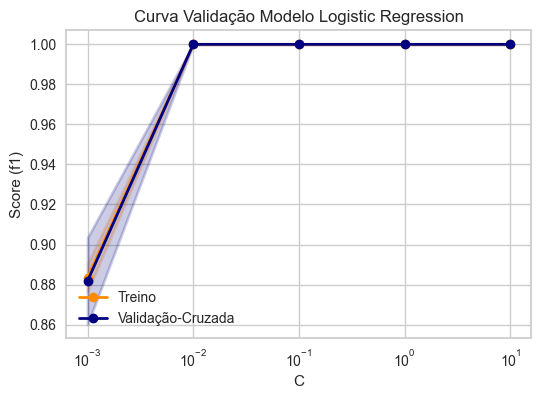

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- shot_made_flag


In [190]:


xtrain, xtest, ytrain, ytest =  train_test_split(df_dev,
                                                     df_dev['shot_made_flag'],
                                                     test_size= percentual_treino,
                                                     stratify=df_dev['shot_made_flag']
                                                   )

exp = pc.setup(
    data = xtrain,
    target = 'shot_made_flag',
    test_data = xtest,
    normalize=True,
    log_experiment=False   
)


lista_modelos = exp.compare_models(['lr','dt'], n_select=2, sort='f1')


# Obter o modelo de regressão logística da lista de modelos
logistic_model = [model for model in lista_modelos if str(model).startswith("LogisticRegression")][0]

# Verificar se o modelo é de regressão logística
if isinstance(logistic_model, LogisticRegression):
   # Selecionar apenas as características do conjunto de teste que o modelo de regressão logística viu durante o treinamento
    xtest_features = xtest.drop(columns=['shot_made_flag'])

    # Obter as probabilidades previstas usando o método predict_proba() do modelo de regressão logística
    y_pred_proba = logistic_model.predict_proba(xtest_features)[:, 1]

    # Calcular o log loss
    logloss = log_loss(ytest, y_pred_proba)

    print("Log Loss:", logloss)
    #Grafico curva de validação
    plot_parameter_validation_curve(xtrain,ytrain, "C", {'C': [0.001, 0.01, 0.1, 1, 10]},logistic_model,"Logistic Regression", "f1",True)
    
# Obter o modelo de árvore de decisão da lista de modelos
decision_tree_model = [model for model in lista_modelos if isinstance(model, DecisionTreeClassifier)][0]

# Obter o modelo de árvore de decisão da lista de modelos
decision_tree_model = [model for model in lista_modelos if isinstance(model, DecisionTreeClassifier)][0]

# Verificar se o modelo é um classificador de árvore de decisão
if isinstance(decision_tree_model, DecisionTreeClassifier):
    # Remover a coluna 'shot_made_flag' do conjunto de teste
    xtest_features = xtest

    # Obter as probabilidades previstas usando o método predict_proba() do modelo de árvore de decisão
    y_pred_proba = decision_tree_model.predict_proba(xtest_features)[:, 1]

    # Calcular o log loss
    logloss = log_loss(ytest, y_pred_proba)

    print("Log Loss (Decision Tree Classifier):", logloss)

print("O modelo selecionado não é uma Regressão Logística.")




In [187]:
from pycaret.classification import setup, compare_models
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Dividir os dados em conjuntos de treinamento e teste
xtrain, xtest, ytrain, ytest = train_test_split(df_dev.drop(columns=['shot_made_flag']),
                                                df_dev['shot_made_flag'],
                                                test_size=percentual_treino,
                                                stratify=df_dev['shot_made_flag'])

# Configurar o experimento PyCaret
exp = setup(data=df_dev,
            target='shot_made_flag',
            test_data=xtest,
            normalize=True,
            log_experiment=False)

# Comparar modelos e selecionar os dois melhores baseados no F1-score
lista_modelos = compare_models(['lr', 'dt'], n_select=2, sort='f1')

# Obter o modelo de regressão logística da lista de modelos
logistic_model = [model for model in lista_modelos if str(model).startswith("LogisticRegression")][0]

# Verificar se o modelo é de regressão logística
if isinstance(logistic_model, LogisticRegression):
    # Selecionar apenas as características do conjunto de teste que o modelo de regressão logística viu durante o treinamento
    xtest_features = xtest

    # Obter as probabilidades previstas usando o método predict_proba() do modelo de regressão logística
    y_pred_proba = logistic_model.predict_proba(xtest_features)[:, 1]

    # Calcular o log loss
    logloss = log_loss(ytest, y_pred_proba)

    print("Log Loss (Logistic Regression):", logloss)

# Obter o modelo de árvore de decisão da lista de modelos
decision_tree_model = [model for model in lista_modelos if isinstance(model, DecisionTreeClassifier)][0]

# Verificar se o modelo é um classificador de árvore de decisão
if isinstance(decision_tree_model, DecisionTreeClassifier):
    # Selecionar apenas as características do conjunto de teste que o modelo de árvore de decisão viu durante o treinamento
    xtest_features = xtest

    # Obter as probabilidades previstas usando o método predict_proba() do modelo de árvore de decisão
    y_pred_proba = decision_tree_model.predict_proba(xtest_features)[:, 1]

    # Calcular o log loss
    logloss = log_loss(ytest, y_pred_proba)

    print("Log Loss (Decision Tree Classifier):", logloss)

print("O modelo selecionado não é uma Regressão Logística.")


ValueError: Invalid value for the target parameter. Column shot_made_flag not found in the data.

In [169]:
from sklearn.metrics import log_loss

# Selecionar apenas as características do conjunto de teste que o modelo de regressão logística viu durante o treinamento
xtest_features = xtest.drop(columns=['shot_made_flag'])

# Obter o modelo de regressão logística da lista de modelos
logistic_model = [model for model in lista_modelos if str(model).startswith("LogisticRegression")][0]

# Obter as probabilidades previstas usando o método predict_proba() do modelo de regressão logística
y_pred_proba = logistic_model.predict_proba(xtest_features)[:, 1]

# Calcular o log loss
logloss = log_loss(ytest, y_pred_proba)

print("Log Loss:", logloss)


Log Loss: 3.3568209238004605


Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


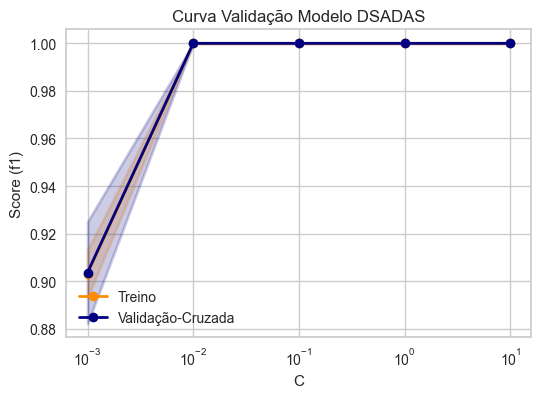

In [155]:
plot_parameter_validation_curve(xtrain,ytrain, "C", {'C': [0.001, 0.01, 0.1, 1, 10]},
                                     lista_modelos[0],"DSADAS", "f1",
                                    True)

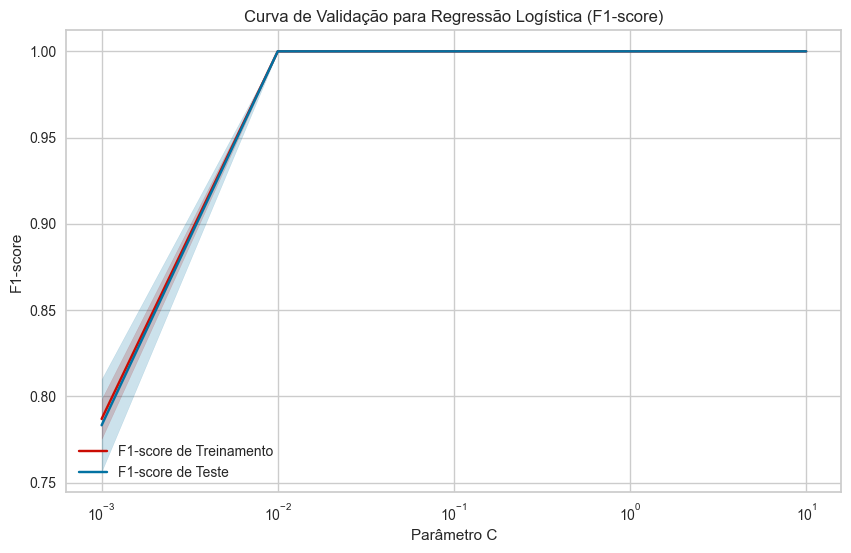

In [159]:

model = lista_modelos[0]

# Definir os valores de parâmetros que queremos testar
param_range = [0.001, 0.01, 0.1, 1, 10]
# Calcular as curvas de validação para diferentes valores de parâmetros
scorer = make_scorer(f1_score)
train_scores, test_scores = validation_curve(
    model, 
    xtrain, 
    ytrain, 
    param_name="C", 
    param_range=param_range, 
    scoring=scorer, 
    n_jobs=-1
)

# Calcular a média e o desvio padrão das pontuações de treinamento e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar as curvas de validação
plt.figure(figsize=(10, 6))
plt.title("Curva de Validação para Regressão Logística (F1-score)")
plt.xlabel("Parâmetro C")
plt.ylabel("F1-score")
plt.semilogx(param_range, train_mean, label="F1-score de Treinamento", color="r")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_mean, label="F1-score de Teste", color="b")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
# Salvar a figura
plt.savefig('curva_validacao_regressao_logistica.png')
plt.show()